##### Project by **Devesh Tripathi** | email: deveshtripathi18878@gmail.com | GitHub: https://github.com/deveshtripathi007


# Problem Stament: 
In the realm of debt collection, the ability to discern which accounts are statute-barred—thus potentially unrecoverable—holds immense significance. This project endeavors to develop a sophisticated machine-learning model aimed at accurately predicting the probability of successfully collecting debts by meticulously examining the statute-barred status of each account.
Given a dataset encompassing a multitude of attributes including original creditor information, account IDs, current balances, purchase dates, and a wealth of other pertinent features, the objective is to construct a predictive model that excels in identifying accounts where the statute barred status may influence the likelihood of debt retrieval.
The focal point of this endeavor centers on the IsStatBarred field ‘Y’ status, which serves as the pivotal target variable for classificion.

## Datset Overview:
1. EntityID: Unique identifier for each entry.
2. OriginalCreditor[Redacted]: Name of the original creditor, with sensitive information redacted.
3. AccountID: Unique identifier for the account.
4. Current Balance: The current balance of the account.
5. DebtLoadPrincipal: The principal amount of the debt load.
6. BalanceAtDebtLoad: The balance at the time of debt load.
7. PurchasePrice: The price at which the debt was purchased.
8. ProductOrDebtType: Type of product or debt.
9. CollectionStatus: Status of the debt collection.
10. CloseDate: The date when the account was closed.
11. Closure Reason: Reason for closing the account.
12. InBankruptcy: Indicates if the account is involved in bankruptcy.
13. AccountInsolvencyType: Type of insolvency related to the account.
14. CustomerInsolvencyType: Type of insolvency related to the customer.
15. IsLegal: Indicates if legal action has been taken.
16. Interest Rate: Interest rate associated with the debt.
17. LastPaymentAmount: Amount of the last payment made.
18. LastPaymentMethod: Method used for the last payment.
19. NumLiableParties: Number of liable parties associated with the account.
20. CustomerAge: Age of the customer.
21. NumPhones: Number of phone contacts associated with the customer.
22. NumEmails: Number of email contacts associated with the customer.
23. NumAddresses: Number of addresses associated with the customer.
24. **IsStatBarred**: Indicates if the debt is statute-barred. on

## Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from statistics import mean

# models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

# evalution metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [5]:
df= pd.read_excel('Company_x.xlsx')

In [6]:
df.head(10)

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.00,1160.20,1160.20,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,...,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,8279.50,8279.50,8279.50,4.22,Other,PASSIVE,NaN,...,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN
5,932,Creditor 1,13465,1118.74,790.30,790.30,4.22,Other,PASSIVE,NaN,...,Cheque,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
6,932,Creditor 1,18664,0.00,71.89,71.89,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,50.0,2,0,1,N,NaN,NaN,NaN
7,160,Creditor 2,18816,0.00,11091.35,11091.35,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
8,932,Creditor 1,21091,481.34,404.67,404.67,4.22,Other,CLOSED,Insolvent,...,Cheque,1.0,NaN,1,0,0,Y,NaN,NaN,NaN
9,932,Creditor 1,24413,0.00,903.76,903.76,4.22,Other,PAID_IN_FULL,NaN,...,Cheque,1.0,46.0,1,0,1,N,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

## Checking Duplicated Data

In [9]:
# Checking for duplicate data on the basis of 'AccountID' as its unique for each debitor
df['AccountID'].duplicated().sum()

0

In [10]:
df.nunique()
# we can see that 'AccountID' has all unique row i.e 406423

EntityID                         229
OriginalCreditor[Redacted]        52
AccountID                     406423
CurrentBalance                177653
DebtLoadPrincipal             195921
Balanaceatdebt_load           198413
PurchasePrice                     48
ProductOrDebtType                 10
CollectionStatus                  12
ClosureReason                     14
InBankruptcy                       2
AccountInsolvencyType              5
CustomerInsolvencyType            13
IsLegal                            2
LastPaymentAmount              25874
LastPaymentMethod                  9
NumLiableParties                   4
CustomerAge                      126
NumPhones                          9
NumEmails                          6
NumAddresses                       8
IsStatBarred                       2
Unnamed: 22                        0
Unnamed: 23                        0
Unnamed: 24                        1
dtype: int64

## Checking Data Imbalance in Target Feature

In [12]:
df.IsStatBarred.value_counts()

IsStatBarred
Y    284548
N    121875
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

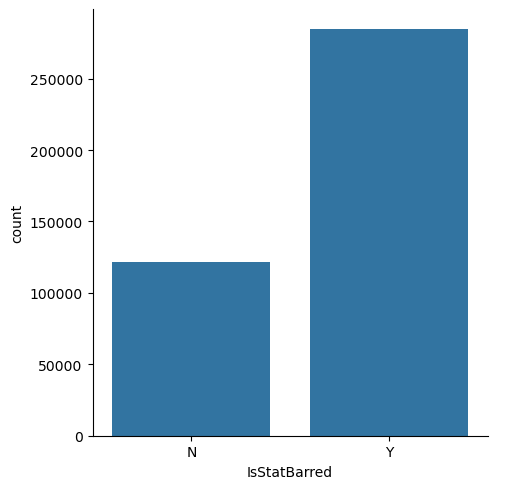

In [13]:
plt.figure(figsize=(15,5))
sns.catplot(data=df, x="IsStatBarred", kind="count")
plt.show()

In [14]:
# minority class('N')%
(121875/(121875+284548))*100

29.987230053417253

## Splitting Data into Feature & Target

In [16]:
# train test split
x = df.drop('IsStatBarred', axis=1)
y= df['IsStatBarred']

In [17]:
y = y.replace({"Y":1, "N":0})
y

0         0
1         1
2         0
3         1
4         1
         ..
406418    0
406419    0
406420    0
406421    0
406422    0
Name: IsStatBarred, Length: 406423, dtype: int64

## Train Test Split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=45) 

In [20]:
xtrain.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,...,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24
275365,99901180,Creditor 44,990102897,0.00,3046.20,3046.20,8.15,Credit Cards,PAID_IN_FULL,NaN,...,151.0,Automatic Payment,1.0,29.0,2,0,1,NaN,NaN,NaN
43483,3010601,Creditor 17,30172750,15.08,15.08,15.08,3.07,Utilities/Telco - Other,PASSIVE,NaN,...,NaN,NaN,1.0,NaN,0,0,1,NaN,NaN,NaN
390442,99901481,Creditor 49,990377685,462.15,462.15,462.15,9.41,Finance Company - Other,PASSIVE,NaN,...,NaN,NaN,1.0,44.0,3,1,1,NaN,NaN,NaN
211215,3011037,Creditor 41,30463021,447.52,405.93,405.93,1.84,Other,ACTIVE,NaN,...,NaN,NaN,1.0,61.0,0,0,1,NaN,NaN,NaN
128999,3010718,Creditor 10,30262842,1298.87,970.77,1183.87,4.96,Other,PASSIVE,NaN,...,NaN,NaN,1.0,43.0,0,0,1,NaN,NaN,NaN


In [21]:
# Calculating numerical_column, numerical_column_index, categorical_column, categorical_column_index

def CloumnsByDtype(df):
    ''' 
    CloumnsByDtype(df)-> Print and return list of column on the basis of datatype i.e Numerical Column and Categorical Column.
    Parameter:
        df:- pandas dataframe 
    '''

    numerical_column = []
    numerical_column_index = []

    categorical_column = []
    categorical_column_index = []

    for feature in df.columns:
        if df[feature].dtype != "O":
            numerical_column.append(feature)
            numerical_column_index.append(df.columns.get_loc(feature))
            
        if df[feature].dtype == "O":
            categorical_column.append(feature)
            categorical_column_index.append(df.columns.get_loc(feature))

    print(f" Numerical Feature ({len(numerical_column)}) : {numerical_column} \n")
    print(f" Numerical Feature Index : {numerical_column_index} \n")
    
    print(f" Categorical Feature ({len(categorical_column)}) : {categorical_column}\n")
    print(f" Categorical Feature Index : {categorical_column_index}\n")

    return numerical_column, numerical_column_index, categorical_column, categorical_column_index
    

## Missing Value Treatment

#### Imputing  xtrain

In [24]:
# Checking Missing Value in each column
xtrain.isnull().sum()

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2150
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                 317900
InBankruptcy                       0
AccountInsolvencyType         324900
CustomerInsolvencyType        318339
IsLegal                            0
LastPaymentAmount             241790
LastPaymentMethod             241790
NumLiableParties                  94
CustomerAge                    23613
NumPhones                          0
NumEmails                          0
NumAddresses                       0
Unnamed: 22                   325138
Unnamed: 23                   325138
Unnamed: 24                   325137
dtype: int64

In [25]:
# find out the total missing values of a xtrain before missing value treatment

missing_value_count = xtrain.isnull().sum()
total_cells = np.product(xtrain.shape)
total_missing = missing_value_count.sum()

print(f"Precentage of missing data for entire dataset is : {(total_missing/total_cells)*100} %")

Precentage of missing data for entire dataset is : 31.345523541798663 %


In [26]:
# identifying % of missing value in each column
missing_value_column = round(xtrain.isna().sum().div(xtrain.shape[0]).mul(100).to_frame().sort_values(by=0, 
                                                                           ascending=False), 2)
missing_value_column

,0
Unnamed: 23,100.00
Unnamed: 22,100.00
Unnamed: 24,100.00
AccountInsolvencyType,99.93
CustomerInsolvencyType,97.91
ClosureReason,97.77
LastPaymentAmount,74.37
LastPaymentMethod,74.37
CustomerAge,7.26
PurchasePrice,0.66


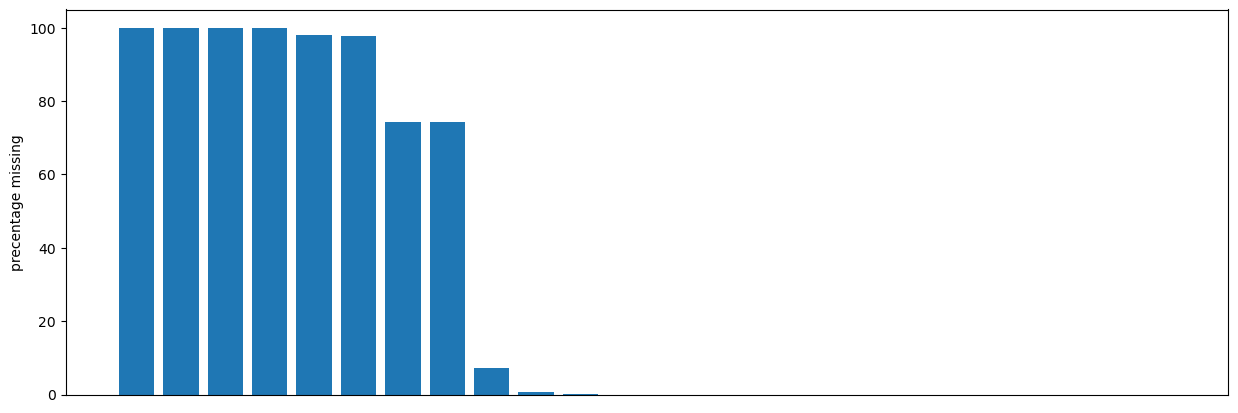

In [27]:
# graph to display % of missing value in each feature
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(missing_value_column.index, missing_value_column.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()
# from graph we can see that some features have nearly 100% missing value so we have to handle it

In [28]:
# shape of xtrain before droping column having missing value % >70
xtrain.shape

(325138, 24)

In [29]:
# selecting column having missing value % >70
dropcols = missing_value_column[missing_value_column[0]>70]
dropcols

,0
Unnamed: 23,100.00
Unnamed: 22,100.00
Unnamed: 24,100.00
AccountInsolvencyType,99.93
CustomerInsolvencyType,97.91
ClosureReason,97.77
LastPaymentAmount,74.37
LastPaymentMethod,74.37


In [30]:
# dropping the columns from the xtrain
xtrain.drop(list(dropcols.index), axis=1, inplace=True)

In [31]:
# shape of df after droping column having missing value % >70
xtrain.shape

(325138, 16)

In [32]:
# calculating numerical and categorical column for xtrain by calling CloumnsByDtype() function
xtrain_numerical_column, xtrain_numerical_column_index, xtrain_categorical_column, xtrain_categorical_column_index = CloumnsByDtype(xtrain)

 Numerical Feature (11) : ['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [1, 7, 8, 9, 10]



In [33]:
# imputation for xtrain numerical column
for column in xtrain_numerical_column:
    if (xtrain[column].isna().sum()/(xtrain.shape[0])*(100))<=8:
        xtrain[column].fillna(xtrain[column].mean(),inplace=True)

In [34]:
# imputation for xtrain categorical column
for column in xtrain_categorical_column:
    if (xtrain[column].isna().sum()/(xtrain.shape[0])*(100))<=8:
        xtrain[column].fillna(xtrain[column].mode(),inplace=True)

In [35]:
xtrain.isnull().sum()

EntityID                      0
OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
Balanaceatdebt_load           0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
dtype: int64

#### Imputing  xtest

In [37]:
# Checking Missing Value in each column
xtest.isnull().sum()

EntityID                          0
OriginalCreditor[Redacted]        0
AccountID                         0
CurrentBalance                    0
DebtLoadPrincipal                 0
Balanaceatdebt_load               0
PurchasePrice                   542
ProductOrDebtType                 0
CollectionStatus                  0
ClosureReason                 79493
InBankruptcy                      0
AccountInsolvencyType         81238
CustomerInsolvencyType        79553
IsLegal                           0
LastPaymentAmount             60656
LastPaymentMethod             60656
NumLiableParties                 28
CustomerAge                    5869
NumPhones                         0
NumEmails                         0
NumAddresses                      0
Unnamed: 22                   81285
Unnamed: 23                   81285
Unnamed: 24                   81285
dtype: int64

In [38]:
# find out the total missing values of a xtest before missing value treatment

missing_value_count = xtest.isnull().sum()
total_cells = np.product(xtest.shape)
total_missing = missing_value_count.sum()

print(f"Precentage of missing data for entire dataset is : {(total_missing/total_cells)*100} %")

Precentage of missing data for entire dataset is : 31.365463082569562 %


In [39]:
# identifying % of missing value in each column
missing_value_column = round(xtest.isna().sum().div(xtest.shape[0]).mul(100).to_frame().sort_values(by=0, 
                                                                           ascending=False), 2)
missing_value_column

,0
Unnamed: 24,100.00
Unnamed: 23,100.00
Unnamed: 22,100.00
AccountInsolvencyType,99.94
CustomerInsolvencyType,97.87
ClosureReason,97.80
LastPaymentAmount,74.62
LastPaymentMethod,74.62
CustomerAge,7.22
PurchasePrice,0.67


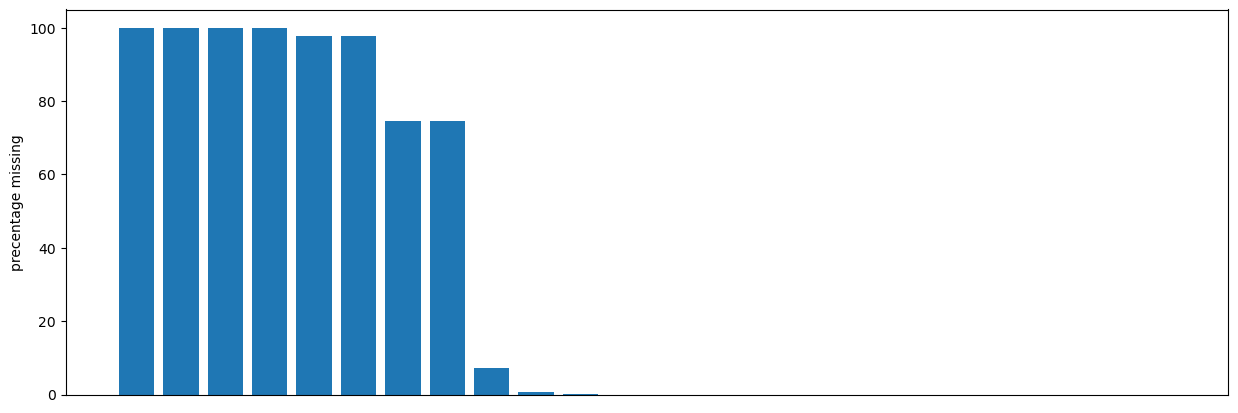

In [40]:
# graph to display % of missing value in each feature
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(missing_value_column.index, missing_value_column.values.T[0])
plt.xticks([])
plt.ylabel("precentage missing")
plt.show()
# from graph we can see that some features have nearly 100% missing value so we have to handle it

In [41]:
# shape of xtest before droping column having missing value % >70
xtest.shape

(81285, 24)

In [42]:
# selecting column having missing value % >70
dropcols = missing_value_column[missing_value_column[0]>70]
dropcols

,0
Unnamed: 24,100.00
Unnamed: 23,100.00
Unnamed: 22,100.00
AccountInsolvencyType,99.94
CustomerInsolvencyType,97.87
ClosureReason,97.80
LastPaymentAmount,74.62
LastPaymentMethod,74.62


In [43]:
# dropping the columns from the xtest
xtest.drop(list(dropcols.index), axis=1, inplace=True)

In [44]:
# shape of xtest after droping column having missing value % >70
xtest.shape

(81285, 16)

In [45]:
# calculating numerical and categorical column for xtest 
xtest_numerical_column, xtest_numerical_column_index, xtest_categorical_column, xtest_categorical_column_index = CloumnsByDtype(xtest)

 Numerical Feature (11) : ['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [1, 7, 8, 9, 10]



In [46]:
# imputation for xtest numerical column if missing value < 8%
for column in xtest_numerical_column:
    if (xtest[column].isna().sum()/(xtest.shape[0])*(100))<=8:
        xtest[column].fillna(xtest[column].mean(),inplace=True)

In [47]:
# imputation for xtest categorical column if missing value < 8%
for column in xtest_categorical_column:
    if (xtest[column].isna().sum()/(xtest.shape[0])*(100))<=8:
        xtest[column].fillna(xtest[column].mode(),inplace=True)

In [48]:
xtest.isnull().sum()
# verifying that there is no missing value after imputation.

EntityID                      0
OriginalCreditor[Redacted]    0
AccountID                     0
CurrentBalance                0
DebtLoadPrincipal             0
Balanaceatdebt_load           0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
dtype: int64

## Correlation Analysis

#### xtrain correlation analysis

In [51]:
# calculating numerical and categorical column for xtrain.
xtrain_numerical_column, xtrain_numerical_column_index, xtrain_categorical_column, xtrain_categorical_column_index = CloumnsByDtype(xtrain)

 Numerical Feature (11) : ['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [1, 7, 8, 9, 10]



<Axes: >

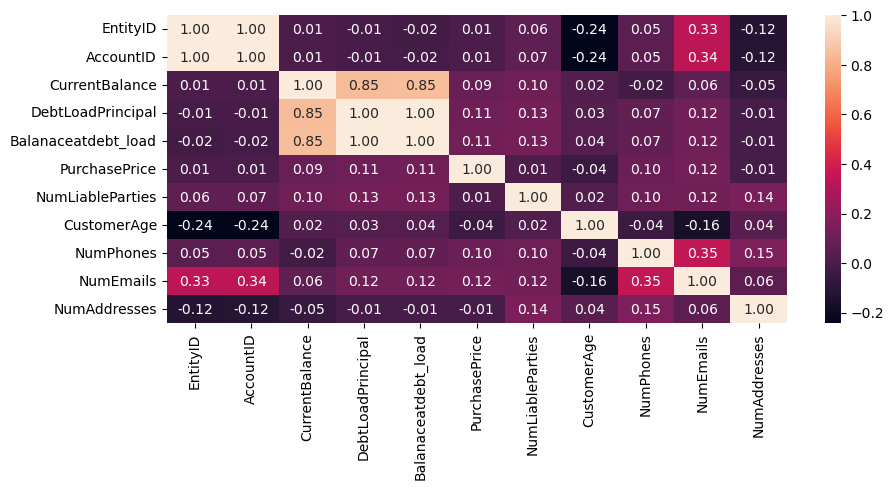

In [52]:
# heatmap to analysis correlation between feature.
plt.figure(figsize=(10, 4))
sns.heatmap(xtrain[xtrain_numerical_column].corr(), annot=True, fmt=".2f")

In [53]:
# droping either of highly correlated column
xtrain.drop(['EntityID', 'DebtLoadPrincipal', 'Balanaceatdebt_load'],axis=1,inplace=True)

In [54]:
xtrain.shape

(325138, 13)

#### xtest correlation analysis

In [56]:
# calculating numerical and categorical column for xtest.
xtest_numerical_column, xtest_numerical_column_index, xtest_categorical_column, xtest_categorical_column_index = CloumnsByDtype(xtest)

 Numerical Feature (11) : ['EntityID', 'AccountID', 'CurrentBalance', 'DebtLoadPrincipal', 'Balanaceatdebt_load', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [1, 7, 8, 9, 10]



<Axes: >

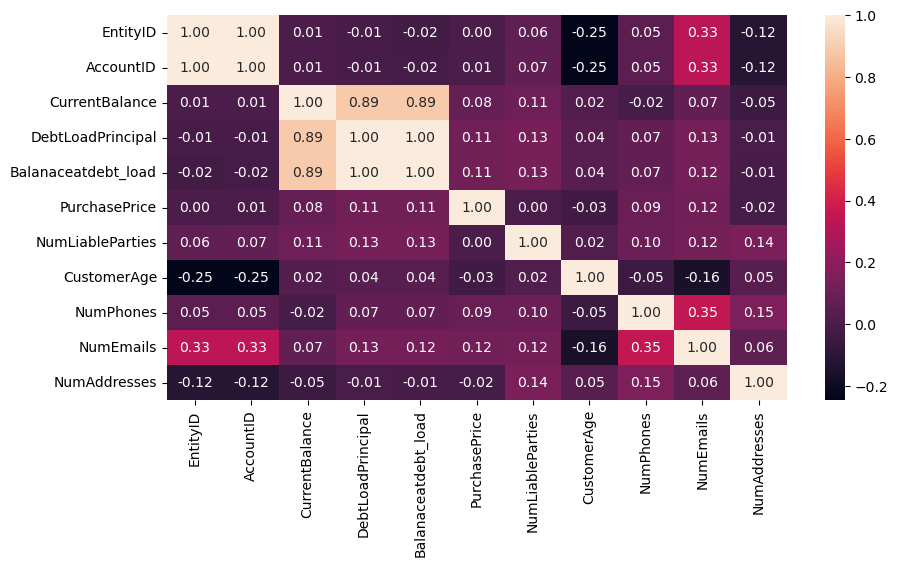

In [57]:
plt.figure(figsize=(10, 5))
sns.heatmap(xtest[xtest_numerical_column].corr(), annot=True, fmt=".2f")

In [58]:
# droping either of highly correlated column
xtest.drop(['EntityID', 'DebtLoadPrincipal', 'Balanaceatdebt_load'],axis=1,inplace=True)

In [59]:
xtest.shape

(81285, 13)

## Data Scaling

In [61]:
# MinMaxScaler [0,1]
min_max_scaler = MinMaxScaler()

#### xtrain

In [63]:
# calculating numerical and categorical column for xtrain.
xtrain_numerical_column, xtrain_numerical_column_index, xtrain_categorical_column, xtrain_categorical_column_index = CloumnsByDtype(xtrain)

 Numerical Feature (8) : ['AccountID', 'CurrentBalance', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [1, 2, 3, 8, 9, 10, 11, 12] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [0, 4, 5, 6, 7]



In [64]:
# scaling xtrain column and storing it in original column
xtrain[xtrain_numerical_column] = min_max_scaler.fit_transform(xtrain[xtrain_numerical_column])

In [65]:
xtrain.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
275365,Creditor 44,0.999603,0.017172,0.153106,Credit Cards,PAID_IN_FULL,N,N,0.0,0.365854,0.250,0.0,0.142857
43483,Creditor 17,0.030459,0.017206,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.467873,0.000,0.0,0.142857
390442,Creditor 49,0.999881,0.018201,0.177342,Finance Company - Other,PASSIVE,Y,N,0.0,0.457317,0.375,0.2,0.142857
211215,Creditor 41,0.030752,0.018168,0.031737,Other,ACTIVE,N,N,0.0,0.560976,0.000,0.0,0.142857
128999,Creditor 10,0.030550,0.020063,0.091748,Other,PASSIVE,N,N,0.0,0.451220,0.000,0.0,0.142857


#### xtest

In [67]:
# calculating numerical and categorical column for xtest.
xtest_numerical_column, xtest_numerical_column_index, xtest_categorical_column, xtest_categorical_column_index = CloumnsByDtype(xtest)

 Numerical Feature (8) : ['AccountID', 'CurrentBalance', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [1, 2, 3, 8, 9, 10, 11, 12] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [0, 4, 5, 6, 7]



In [68]:
# scaling xtest column and storing it in original column
xtest[xtest_numerical_column] = min_max_scaler.transform(xtest[xtest_numerical_column])

In [69]:
xtest.head()

,OriginalCreditor[Redacted],AccountID,CurrentBalance,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
84128,Creditor 17,0.030500,0.022038,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.467778,0.0,0.0,0.142857
62672,Creditor 17,0.030478,0.017545,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.463415,0.0,0.0,0.142857
319606,Creditor 47,0.999705,0.017714,0.040969,Utilities/Telco - Other,ACTIVE,N,N,0.0,0.402439,0.0,0.0,0.142857
119250,Creditor 17,0.030535,0.018121,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.402439,0.0,0.0,0.142857
102815,Creditor 17,0.030519,0.017863,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.420732,0.0,0.0,0.142857


## Outlier Treatment 

In [71]:
# function to calculate outlier % of each column
def calculate_outlier_percentage(df): 
    """
    calculate_outlier_percentage(df) - is a function which calculate the outlier percentage of each column in dataframe.
    
    Parameter:
        df - pandas dataframe 
    """
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percent = (len(outliers) / len(df)) * 100
        print(f'Outlier% of  {column}: {round(outlier_percent,2)}% ')


In [72]:
# # function to treat outlier in each column
# def handle_outliers(X_train, y_train):
#     for column in X_train.select_dtypes(include=['float64', 'int64']).columns:
#         Q1 = X_train[column].quantile(0.25)
#         Q3 = X_train[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_limit = Q1 - 1.5 * IQR
#         upper_limit = Q3 + 1.5 * IQR
        
#         # Identify outliers in X_train column
#         outliers = (X_train[column] < lower_limit) | (X_train[column] > upper_limit)
#         outlier_count = outliers.sum()
#         total_rows = len(X_train)
        
#         # Calculate outlier percentage
#         outlier_percentage = (outlier_count / total_rows) * 100
    
#         if outlier_percentage <= 5:
#             X_train[column] = X_train[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
            
#         if outlier_percentage >= 10:
#             X_train = X_train[~outliers]
#             y_train = y_train[~outliers]
    
#     return X_train, y_train



In [73]:
# function to treat outlier in each column by caping it to lower_limit to upper_limit
def handle_outliers(df):
    """
    handle_outliers(df) function is used to handle outlier in dataset by caping them them to their respctive limit 
    (lower_limit if value < lower limit | upper_limit if value > upper_limit | else keep as it is).

    Parameter:
        df- pandas dataframe
    """
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Identify outliers in X_train column
        outliers = (df[column] < lower_limit) | (df[column] > upper_limit)
        outlier_count = outliers.sum()
        total_rows = len(df)
        
        # Calculate outlier percentage
        outlier_percentage = (outlier_count / total_rows) * 100

        df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    


#### xtrain outlier treatment

In [75]:
# calculating numerical and categorical column for xtrain.
xtrain_numerical_column, xtrain_numerical_column_index, xtrain_categorical_column, xtrain_categorical_column_index = CloumnsByDtype(xtrain)

 Numerical Feature (8) : ['AccountID', 'CurrentBalance', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [1, 2, 3, 8, 9, 10, 11, 12] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [0, 4, 5, 6, 7]



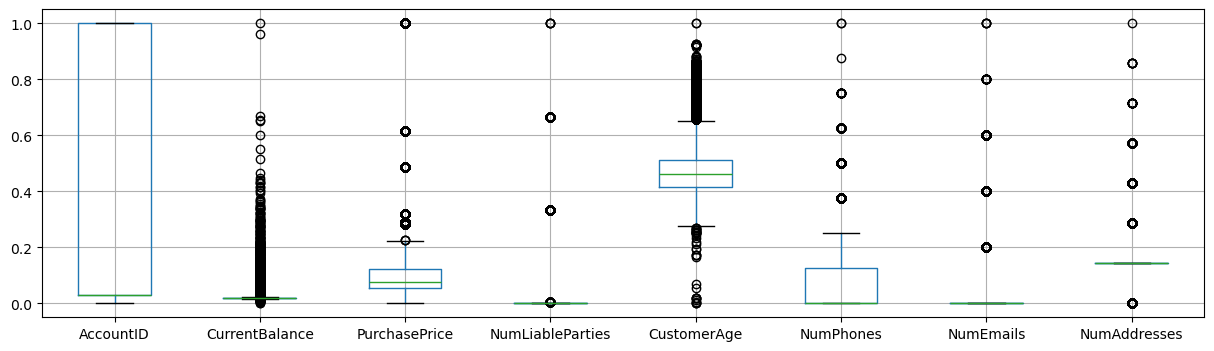

In [76]:
# displaying outlier in all numerical_column of xtrain
plt.figure(figsize=(15,4))
xtrain.boxplot(xtrain_numerical_column)
plt.show()

In [77]:
# printing outlier% of each column before outlier treatment
calculate_outlier_percentage(xtrain)

Outlier% of  AccountID: 0.0% 
Outlier% of  CurrentBalance: 10.52% 
Outlier% of  PurchasePrice: 2.62% 
Outlier% of  NumLiableParties: 1.7% 
Outlier% of  CustomerAge: 1.84% 
Outlier% of  NumPhones: 1.7% 
Outlier% of  NumEmails: 19.74% 
Outlier% of  NumAddresses: 22.23% 


In [78]:
# handling outlier
handle_outliers(xtrain)

In [79]:
# printing outlier% of each column after outlier treatment
calculate_outlier_percentage(xtrain)

Outlier% of  AccountID: 0.0% 
Outlier% of  CurrentBalance: 0.0% 
Outlier% of  PurchasePrice: 0.0% 
Outlier% of  NumLiableParties: 0.0% 
Outlier% of  CustomerAge: 0.0% 
Outlier% of  NumPhones: 0.0% 
Outlier% of  NumEmails: 0.0% 
Outlier% of  NumAddresses: 0.0% 


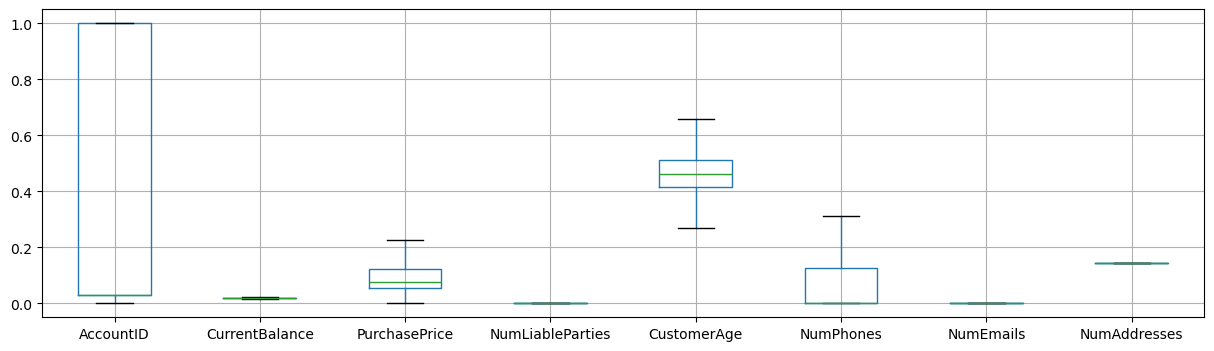

In [80]:
# displaying outlier in all numerical_column of xtrain after outlier treatment
plt.figure(figsize=(15,4))
xtrain.boxplot(xtrain_numerical_column)
plt.show()

#### xtest outlier treatment

In [82]:
# calculating numerical and categorical column for xtest.
xtest_numerical_column, xtest_numerical_column_index, xtest_categorical_column, xtest_categorical_column_index = CloumnsByDtype(xtest)

 Numerical Feature (8) : ['AccountID', 'CurrentBalance', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [1, 2, 3, 8, 9, 10, 11, 12] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [0, 4, 5, 6, 7]



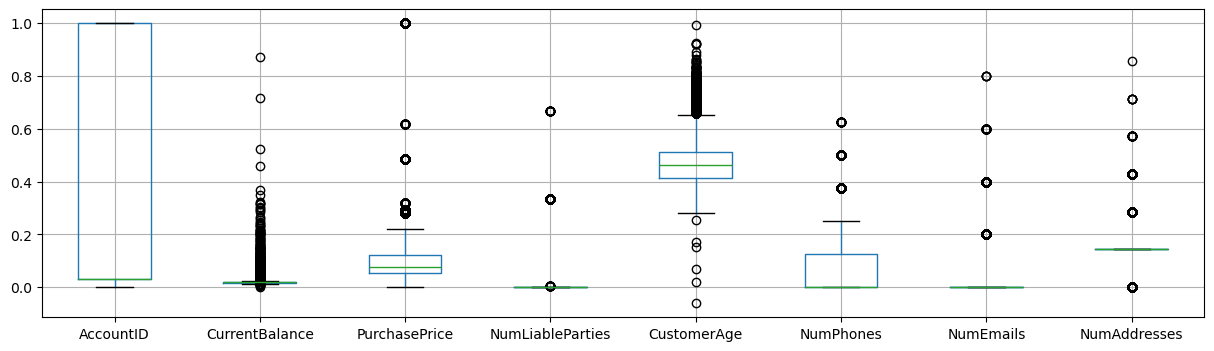

In [83]:
# displaying outlier in all numerical_column of xtest 
plt.figure(figsize=(15,4))
xtest.boxplot(xtest_numerical_column)
plt.show()

In [84]:
# printing outlier% of each column before outlier treatment
calculate_outlier_percentage(xtest)

Outlier% of  AccountID: 0.0% 
Outlier% of  CurrentBalance: 10.71% 
Outlier% of  PurchasePrice: 2.67% 
Outlier% of  NumLiableParties: 1.72% 
Outlier% of  CustomerAge: 1.84% 
Outlier% of  NumPhones: 1.7% 
Outlier% of  NumEmails: 19.58% 
Outlier% of  NumAddresses: 22.18% 


In [85]:
# handling outlier
handle_outliers(xtest)

In [86]:
# printing outlier% of each column of xtest after outlier treatment
calculate_outlier_percentage(xtest)

Outlier% of  AccountID: 0.0% 
Outlier% of  CurrentBalance: 0.0% 
Outlier% of  PurchasePrice: 0.0% 
Outlier% of  NumLiableParties: 0.0% 
Outlier% of  CustomerAge: 0.0% 
Outlier% of  NumPhones: 0.0% 
Outlier% of  NumEmails: 0.0% 
Outlier% of  NumAddresses: 0.0% 


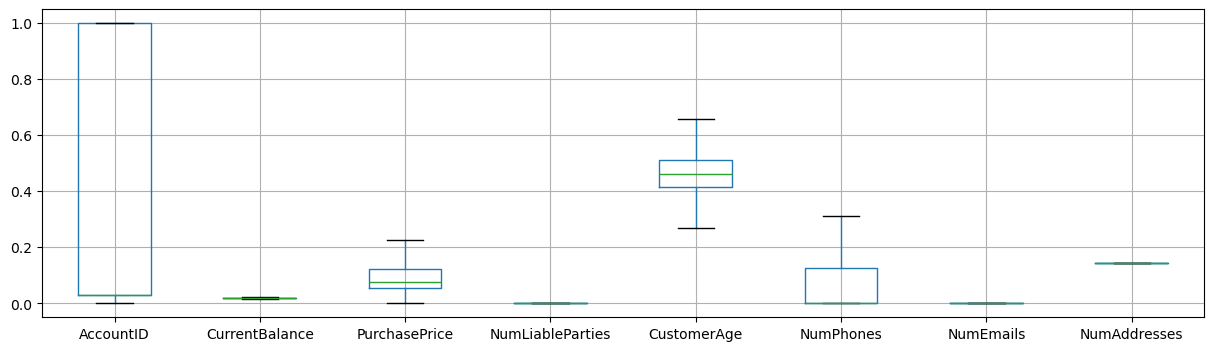

In [87]:
# displaying outlier in all numerical_column of xtest after outlier treatment
plt.figure(figsize=(15,4))
xtest.boxplot(xtest_numerical_column)
plt.show()

## Data Transformation (Data Encoding)

In [89]:
# creating object of OrdinalEncoder() class
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

#### Encoding xtrain

In [91]:
# calculating numerical and categorical column for xtrain.
xtrain_numerical_column, xtrain_numerical_column_index, xtrain_categorical_column, xtrain_categorical_column_index = CloumnsByDtype(xtrain)

 Numerical Feature (8) : ['AccountID', 'CurrentBalance', 'PurchasePrice', 'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails', 'NumAddresses'] 

 Numerical Feature Index : [1, 2, 3, 8, 9, 10, 11, 12] 

 Categorical Feature (5) : ['OriginalCreditor[Redacted]', 'ProductOrDebtType', 'CollectionStatus', 'InBankruptcy', 'IsLegal']

 Categorical Feature Index : [0, 4, 5, 6, 7]



In [92]:
for col in xtrain_categorical_column:
    print(f"{col} : {xtrain[col].nunique()}")
    

OriginalCreditor[Redacted] : 51
ProductOrDebtType : 10
CollectionStatus : 12
InBankruptcy : 2
IsLegal : 2


In [93]:
# for col in xtrain_categorical_column:
#     xtrain[col]= label_encoder.fit_transform(xtrain[col])
xtrain[['InBankruptcy', 'IsLegal']]=ordinal_encoder.fit_transform(xtrain[['InBankruptcy', 'IsLegal']])

In [94]:
one_hot_encoder = ColumnTransformer(
    transformers=[
        ('categorical',OneHotEncoder(handle_unknown='ignore'), xtrain_categorical_column) ],remainder='passthrough') # Keep other columns as they are

In [95]:
xtrain

,OriginalCreditor[Redacted],AccountID,CurrentBalance,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
275365,Creditor 44,0.999603,0.017172,0.153106,Credit Cards,PAID_IN_FULL,0.0,0.0,0.0,0.365854,0.2500,0.0,0.142857
43483,Creditor 17,0.030459,0.017206,0.055395,Utilities/Telco - Other,PASSIVE,0.0,0.0,0.0,0.467873,0.0000,0.0,0.142857
390442,Creditor 49,0.999881,0.018201,0.177342,Finance Company - Other,PASSIVE,1.0,0.0,0.0,0.457317,0.3125,0.0,0.142857
211215,Creditor 41,0.030752,0.018168,0.031737,Other,ACTIVE,0.0,0.0,0.0,0.560976,0.0000,0.0,0.142857
128999,Creditor 10,0.030550,0.020063,0.091748,Other,PASSIVE,0.0,0.0,0.0,0.451220,0.0000,0.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81853,Creditor 17,0.030497,0.019025,0.055395,Utilities/Telco - Other,PASSIVE,0.0,0.0,0.0,0.426829,0.0000,0.0,0.142857
406111,Creditor 50,0.999999,0.018182,0.138296,Finance Company - Other,ACTIVE,0.0,0.0,0.0,0.439024,0.2500,0.0,0.142857
323104,Creditor 47,0.999709,0.017900,0.040969,Utilities/Telco - Other,ACTIVE,0.0,0.0,0.0,0.530488,0.0000,0.0,0.142857
399228,Creditor 50,0.999965,0.019365,0.138296,Finance Company - Other,ACTIVE,0.0,0.0,0.0,0.353659,0.0000,0.0,0.142857


In [96]:
xtest

,OriginalCreditor[Redacted],AccountID,CurrentBalance,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
84128,Creditor 17,0.030500,0.022038,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.467778,0.000,0.0,0.142857
62672,Creditor 17,0.030478,0.017545,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.463415,0.000,0.0,0.142857
319606,Creditor 47,0.999705,0.017714,0.040969,Utilities/Telco - Other,ACTIVE,N,N,0.0,0.402439,0.000,0.0,0.142857
119250,Creditor 17,0.030535,0.018121,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.402439,0.000,0.0,0.142857
102815,Creditor 17,0.030519,0.017863,0.055395,Utilities/Telco - Other,PASSIVE,N,N,0.0,0.420732,0.000,0.0,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289242,Creditor 44,0.999671,0.020141,0.099058,Bank - Other,ACTIVE,N,N,0.0,0.384146,0.000,0.0,0.142857
172280,Creditor 33,0.030670,0.017851,0.065590,Utilities/Telco - Other,ACTIVE,N,N,0.0,0.420732,0.125,0.0,0.142857
295685,Creditor 47,0.999681,0.017465,0.040969,Utilities/Telco - Other,ACTIVE,N,N,0.0,0.591463,0.125,0.0,0.142857
273349,Creditor 19,0.999586,0.023371,0.138296,Finance Company - Other,ACTIVE,N,N,0.0,0.579268,0.000,0.0,0.142857


## Model Building (using Pipeline) & Evaluation

In [98]:
# lists to store accuracy of all model
model_list = []
accuracy = []
precision = []
recall = []
F1_score = []
auc_roc = []

In [99]:
def evaluate_model(true, predicted):
    """
    evaluate_model(true, predicted) is a function which calculate and return evaluation metrics(Accuracy, Precision, Recall, F1_Score, AUC(ROC)) of
    Ml classification model.

    Parameter:
        true- original Target value of each row. 
        predicted- predicted value of each row by ML model.

    Return:
     acc- accuracy of model.
     f1- f1 score of model.
     pre- precision of model.
     recall- recall of model.
     auc- area under the curve of roc(Receiver Operating Characteristic) curve.
    """
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)   
    pre = precision_score(true, predicted)   
    recall = recall_score(true, predicted) 
    auc = roc_auc_score(true, predicted)  
    
    return round(acc*100,2), round(f1*100,2), round(pre*100,2), round(recall*100,2), round(auc,2)

In [100]:

def build_evaluate(pipeline, model):
    """
    build_evaluate(pipeline, model) is function which fits the model and do prediction and then evaluate the model by 
    calling evaluate_model(true, predicted) function.
    
    Parameter:
        pipeline- pipline having final estimator(ml model).
        model- string which contains name of estimitor(ml model) in final step of pipeline.
    """
    pipeline.fit(xtrain, ytrain) # training the model

     # make training prediction
    ytrain_pred = pipeline.predict(xtrain)
        
    # make testing prediction
    ytest_pred = pipeline.predict(xtest)

    # calling evaluate model function to evaluate performance of our training data.
    train_accuracy, train_f1_score, train_precision, train_recall, train_auc = evaluate_model(ytrain, ytrain_pred)
        
    # calling evaluate model function to evaluate performance of our testing data.
    test_accuracy, test_f1_score, test_precision, test_recall, test_auc = evaluate_model(ytest, ytest_pred)
    
    model_list.append(model)
    accuracy.append(test_accuracy)
    precision.append(test_precision)
    recall.append(test_recall)
    F1_score.append(test_f1_score)
    auc_roc.append(test_auc)

    print(model,':')
    print("Model performance for Training & Testing Set")
    print(f"- Training Accuracy: {train_accuracy} | Testing Accuracy: {test_accuracy} ")
    print(f"- Training f1 score: {train_f1_score} | Testing f1 score: {test_f1_score} ")        
    print(f"- Training Precision score: {train_precision} | Testing Precision Score: {test_precision}")        
    print(f"- Training Recall: {train_recall} | Testing Recall: {test_recall} " )        
    print(f"- Training AUC: {train_auc} | Testing AUC: {test_auc} ")
        

### Logistic Regression

In [102]:
logistic_regression_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("LogisticRegression",LogisticRegression())])

build_evaluate(logistic_regression_pipeline,"LogisticRegression" )

LogisticRegression :
Model performance for Training & Testing Set
- Training Accuracy: 96.35 | Testing Accuracy: 95.79 
- Training f1 score: 97.42 | Testing f1 score: 97.06 
- Training Precision score: 96.37 | Testing Precision Score: 95.14
- Training Recall: 98.49 | Testing Recall: 99.06 
- Training AUC: 0.95 | Testing AUC: 0.94 


### Decision Tree

In [104]:
decision_tree_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("Decision Tree", DecisionTreeClassifier())])


build_evaluate(decision_tree_pipeline, "Decision Tree")

Decision Tree :
Model performance for Training & Testing Set
- Training Accuracy: 99.85 | Testing Accuracy: 94.06 
- Training f1 score: 99.89 | Testing f1 score: 95.76 
- Training Precision score: 99.94 | Testing Precision Score: 95.91
- Training Recall: 99.85 | Testing Recall: 95.6 
- Training AUC: 1.0 | Testing AUC: 0.93 


### Random Forest

In [106]:
random_forest_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("Random Forest", RandomForestClassifier())])


build_evaluate(random_forest_pipeline, "Random Forest")

Random Forest :
Model performance for Training & Testing Set
- Training Accuracy: 99.1 | Testing Accuracy: 96.65 
- Training f1 score: 99.36 | Testing f1 score: 97.63 
- Training Precision score: 98.87 | Testing Precision Score: 97.13
- Training Recall: 99.85 | Testing Recall: 98.13 
- Training AUC: 0.99 | Testing AUC: 0.96 


### Naive Bayes

In [108]:
naive_bayes_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("Naive Bayes",BernoulliNB())])

build_evaluate(naive_bayes_pipeline, "Naive Bayes")

Naive Bayes :
Model performance for Training & Testing Set
- Training Accuracy: 93.78 | Testing Accuracy: 89.05 
- Training f1 score: 95.5 | Testing f1 score: 91.7 
- Training Precision score: 96.63 | Testing Precision Score: 97.94
- Training Recall: 94.4 | Testing Recall: 86.2 
- Training AUC: 0.93 | Testing AUC: 0.91 


### AdaBoost

In [110]:
adaboost_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("AdaBoost",AdaBoostClassifier())])

build_evaluate(adaboost_pipeline, "AdaBoost")

AdaBoost :
Model performance for Training & Testing Set
- Training Accuracy: 96.58 | Testing Accuracy: 96.29 
- Training f1 score: 97.58 | Testing f1 score: 97.41 
- Training Precision score: 96.57 | Testing Precision Score: 95.62
- Training Recall: 98.61 | Testing Recall: 99.26 
- Training AUC: 0.95 | Testing AUC: 0.94 


### GradientBoosting

In [112]:
gradientboost_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
                                   ("Gradient Boosting",GradientBoostingClassifier())])

build_evaluate(gradientboost_pipeline, "Gradient Boosting")

Gradient Boosting :
Model performance for Training & Testing Set
- Training Accuracy: 96.87 | Testing Accuracy: 96.36 
- Training f1 score: 97.79 | Testing f1 score: 97.41 
- Training Precision score: 96.91 | Testing Precision Score: 97.09
- Training Recall: 98.68 | Testing Recall: 97.74 
- Training AUC: 0.96 | Testing AUC: 0.95 


### KNN classifier

In [114]:
# knn_pipeline = Pipeline(steps=[ ('OneHotEncoder', one_hot_encoder),
#                                    ("KNN Classifier",KNeighborsClassifier())])

# build_evaluate(knn_pipeline, "KNN Classifier")

### Compairson of Model (Report)

In [116]:
# Model Report
report = pd.DataFrame({"Model":model_list, 
                           "Accuracy": accuracy, 
                           "Precision": precision, 
                           "Recall":recall,
                           "F1 Score": F1_score,
                           "AUC-ROC":auc_roc}).sort_values(by=["Accuracy"],ascending=False)

report

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
2,Random Forest,96.65,97.13,98.13,97.63,0.96
5,Gradient Boosting,96.36,97.09,97.74,97.41,0.95
4,AdaBoost,96.29,95.62,99.26,97.41,0.94
0,LogisticRegression,95.79,95.14,99.06,97.06,0.94
1,Decision Tree,94.06,95.91,95.60,95.76,0.93
3,Naive Bayes,89.05,97.94,86.20,91.70,0.91


# Best Model


In [118]:
random_forest_pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['OriginalCreditor[Redacted]',
                                                   'ProductOrDebtType',
                                                   'CollectionStatus',
                                                   'InBankruptcy',
                                                   'IsLegal'])])),
                ('Random Forest', RandomForestClassifier())])

In [119]:
ytrain_pred = random_forest_pipeline.predict(xtrain)
ytest_pred = random_forest_pipeline.predict(xtest)
ytest_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

#### Train and Test evaluation metrices

In [121]:
# calling evaluate model function to evaluate performance of our training data.
train_accuracy, train_f1_score, train_precision, train_recall, train_auc = evaluate_model(ytrain, ytrain_pred)

# calling evaluate model function to evaluate performance of our testing data.
test_accuracy, test_f1_score, test_precision, test_recall, test_auc = evaluate_model(ytest, ytest_pred)

print("Model performance for Training and Testing Set: ")
print(f"- Training Accuracy: {train_accuracy} | Testing Accuracy: {test_accuracy} ")
print(f"- Training f1 score: {train_f1_score} | Testing f1 score: {test_f1_score} ")        
print(f"- Training Precision score: {train_precision} | Testing Precision Score: {test_precision}")        
print(f"- Training Recall: {train_recall} | Testing Recall: {test_recall} " )        
print(f"- Training ROC: {train_auc} | Testing ROC: {test_auc} ")

Model performance for Training and Testing Set: 
- Training Accuracy: 99.1 | Testing Accuracy: 96.62 
- Training f1 score: 99.36 | Testing f1 score: 97.6 
- Training Precision score: 98.88 | Testing Precision Score: 97.18
- Training Recall: 99.84 | Testing Recall: 98.03 
- Training ROC: 0.99 | Testing ROC: 0.96 


In [122]:
# Training Confusion matrix
train_confusion_matrix = confusion_matrix(ytrain, ytrain_pred)
train_confusion_matrix

array([[ 95044,   2578],
       [   364, 227152]], dtype=int64)

In [123]:
# Testing Confusion matrix
test_confusion_matrix = confusion_matrix(ytest, ytest_pred)
test_confusion_matrix

array([[22631,  1622],
       [ 1126, 55906]], dtype=int64)

#### AUC of ROC

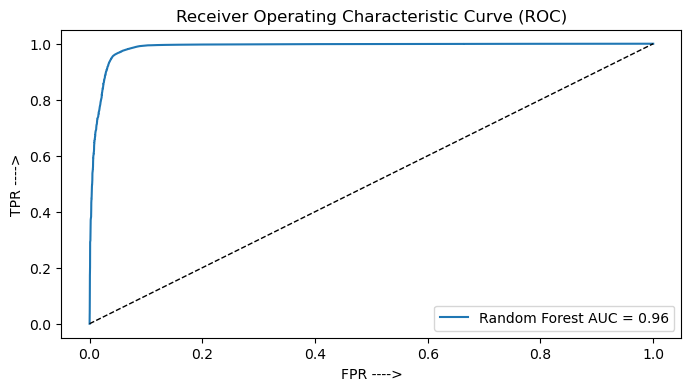

In [125]:
ytest_pred_prob = random_forest_pipeline.predict_proba(xtest)[::,1]  
# .predict_proba() gives probability of prediction of both class 0 and 1 as two col ,in which we need only col 1 (class 1 probability) 
fpr,tpr, _ = roc_curve(ytest, ytest_pred_prob)

plt.figure(figsize=(8,4))
plt.plot(fpr,tpr,label="Random Forest AUC = "+ str(test_auc))
plt.plot([0,1], [0,1], color='black', lw=1, linestyle='--')
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()